Here is my intro to python and jupyter notebook to help myself remember key ideas.

Taken from: 
### Numerical Optimization - Nocedal & Wright
### Chapter 3 Line Search Methods
$x_{k+1}=x_k+\alpha_kp_k$
<br>
where $\alpha_k>0$ is the step length and $p_k$ is the (descent) direction. 

Requirements include *Wolfe Conditions*, 
<br>
$\begin{align*}
f(x_k+\alpha p_k) & \leq f(x_k)+c_1\alpha_k\nabla f_k^Tp_k,\\
\nabla f(x_k+\alpha p_k)^T p_k & \geq c_2 \nabla f_k^T p_k, 
\end{align*}$
1. Sufficient decrease condition, AKA *Armijo condition*, (we are decreasing enough with each step)
2. Curvature condition (making sure we are taking advantage of step size if the slope is steep)

Lets begin with **Backtracking Line Search**. It only requires condition 1. 

__ Algorithm 3.1 __ (Backtracking Line Search)
<br>
Choose $\bar\alpha, \rho \in (0,1), c\in(0,1)$; Set $\alpha \leftarrow \bar\alpha$;
<br>
__repeat__ until $f(x_k+\alpha p_k) \leq f(x_k)+c\alpha_k\nabla f_k^Tp_k$
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\alpha \leftarrow \rho \alpha$ 
<br>
__end (repeat)__
<br>
Terminate with $\alpha_k=\alpha$
<br>


We will apply this method to the Rosenbrok function, $f(x) = 100(x_2-x_1^2)^2+(1-x_1)^2$, which we know has a global minimum at $x^*=[1,1]^T$.


In [2]:
from mpl_toolkits import mplot3d # Need this to plot in 3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from numpy.linalg import inv # Need this to calculate inverse of Hessian
#from numpy import linalg as LA

# rosenbrok function
def rosenbrok(x1,x2):
    return 100*(x2-x1**2)**2+(1-x1)**2

def f(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

# Gradient of rosenbrok function
def  grad_f(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2+2*x[0], 200*(x[1]-x[0]**2)])
    
# Search Direction 
def srch_dir(x):
    t = grad_f(x)
    return -t/np.linalg.norm(t)

def backtracking_line_search(alpha_bar,rho,c,x,pk):
    alpha = alpha_bar
    while f(x+alpha*pk) > f(x)+c*alpha*pk.T.dot(grad_f(x)):
        alpha = rho*alpha
#        print(alpha)
    return alpha

Our initial conditions are as follows: $x_1= [1.2,1.2]^T,\; \bar\alpha = 1,\;\rho = 1/2,\;c = 1e-4$.

In [3]:
# Initialization process 
x = np.array([1.2,1.2])
alpha_bar = 1
rho = 1/2
c = 1e-4

We can begin our Backtracking Line Search.

In [4]:
pk = srch_dir(x)
alpha = alpha_bar
f(x+alpha*pk)

# Running the code
x_store = x    
iter_count = 1
while f(x)> 1e-8:
    pk = srch_dir(x)
    ak = backtracking_line_search(alpha_bar,rho,c,x,pk)
    xk = x+ak*pk
    x_store = np.row_stack((x_store,xk))
#    Update x with new iteration
    x = xk
    iter_count+=1
print(iter_count)

7612


Let's view the results visually. First, our Rosenbrok Function looks like:

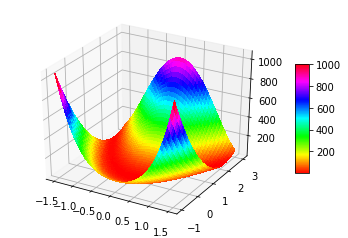

In [5]:
# Boundaries 
x1 = np.linspace(-1.5,1.5,100)
x2 = np.linspace(-1,3,100)

# Creating a meshgrid for plotting
X1, X2 = np.meshgrid(x1,x2)
Z = rosenbrok(X1,X2)

# Plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap=cm.hsv, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=8) #aspect, narrower color bar
plt.show()

Text(0.5,1,'Contour Plot for Rosenbrock Function')

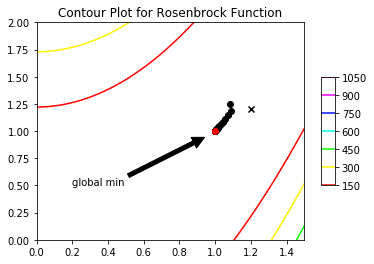

In [6]:
# Plot Contour Plot
fig, ax = plt.subplots()
cont = ax.contour(X1, X2, Z, cmap=cm.hsv)
fig.colorbar(cont, shrink=0.5, aspect=8) #aspect, narrower color bar
plt.scatter(x_store[0,0],x_store[0,1], color='black', marker = 'x')
plt.axis([0, 1.5, 0, 2])

for ii in range(1,len(x_store),int(len(x_store)*.05)):
    plt.scatter(x_store[ii,0],x_store[ii,1], color='black')

plt.scatter(1, 1, color='red')
ax.annotate('global min', xy=(.95, .95), xytext=(.2, .5),
            arrowprops=dict(facecolor='black', shrink=0.02),
            )

ax.set_title('Contour Plot for Rosenbrock Function')

### Result
From steepest descent, we can take away that the rate of convergence, while simple to execute (only requires the gradient and no second derivatives), is extremely slow. 

How slow? 
<br>
**Page 43 3.3 Rate of Convergence**, shows that in a simple quadratic example **the rate convergence is linear** ("similar on general nonlinear objective functions"). Page 44 also provides an example that after 1000 iters, it went from $f(x_1)=1$ to $f(x_{1000})=0.08$. Note that $f(x_*)=0$ where $x_*$ is the global minimum. 

### Now Let's examine Line Search with Newton Direction 

$\rho_k = -[\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$. 
<br> 
Convergence rate: Quadratic. 
<br> 
Derivation of $\rho_k$ is explained in a seperate notebook. 

In [8]:
# Calculating the Hessian of our Rosenbrok Function
def H(x):
    return np.array([[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]])
  
def Newton(x):
    return -inv(H(x)).dot(grad_f(x))
    
x = np.array([1.2,1.2])
alpha_bar = 1
rho = 1/2
c = 1e-4


pk = Newton(x)
alpha = alpha_bar
f(x+alpha*pk)

# Running the code
x_store = x    
iter_count = 0

while f(x) > 1e-8:
    pk = Newton(x)
    ak = backtracking_line_search(alpha_bar,rho,c,x,pk)
    xk = x+ak*pk
    x_store = np.row_stack((x_store,xk))
#    Update x with new iteration
    x = xk
    iter_count += 1
    
print(iter_count)  
f(x)
x

7


array([1.00000018, 1.00000035])

Immediately, we notice how quickly the Newton Method algorithm convervges. 
<br>
Although, computationally more expensive (since we need second derivatives and inverse of the hessian) the convergence rate makes up foe these extra computations. 7 iterations vs 7612